# EPR on 4 Qubits

## 1. Create the design in Metal

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
from pprint import pprint
import pyEPR as epr

In [3]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander

In [4]:
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '9 um'

### In this example, the design consists of 4 qubits and 4 CPWs

In [5]:
# Allow running the same cell here multiple times to overwrite changes
design.overwrite_enabled = True

## Custom options for all the transmons
options = dict(
    # Some options we want to modify from the defaults
    # (see below for defaults)
    pad_width = '425 um', 
    pocket_height = '650um',
    # Adding 4 connectors (see below for defaults)
    connection_pads=dict(
        readout = dict(loc_W=+1,loc_H=-1, pad_width='200um'),
        bus1 = dict(loc_W=-1,loc_H=+1, pad_height='30um'),
        bus2 = dict(loc_W=-1,loc_H=-1, pad_height='50um')
    )
)

## Create 4 transmons

q1 = TransmonPocket(design, 'Q1', options = dict(
    pos_x='+2.42251mm', pos_y='+0.0mm', **options))
q2 = TransmonPocket(design, 'Q2', options = dict(
    pos_x='+0.0mm', pos_y='-0.95mm', orientation = '270', **options))
q3 = TransmonPocket(design, 'Q3', options = dict(
    pos_x='-2.42251mm', pos_y='+0.0mm', orientation = '180', **options))
q4 = TransmonPocket(design, 'Q4', options = dict(
    pos_x='+0.0mm', pos_y='+0.95mm', orientation = '90', **options))

RouteMeander.get_template_options(design)

options = Dict(
        lead=Dict(
            start_straight='0.2mm',
            end_straight='0.2mm'),
        trace_gap='9um',
        trace_width='15um')

def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str, asymmetry='0 um', flip=False, fillet='90um'):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        fillet=fillet,
        hfss_wire_bonds = True,
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        total_length=length)
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

asym = 140
cpw1 = connect('cpw1', 'Q1', 'bus2', 'Q2', 'bus1', '6.0 mm', f'+{asym}um')
cpw2 = connect('cpw2', 'Q3', 'bus1', 'Q2', 'bus2', '6.1 mm', f'-{asym}um', flip=True)
cpw3 = connect('cpw3', 'Q3', 'bus2', 'Q4', 'bus1', '6.0 mm', f'+{asym}um')
cpw4 = connect('cpw4', 'Q1', 'bus1', 'Q4', 'bus2', '6.1 mm', f'-{asym}um', flip=True)

gui.rebuild()
gui.autoscale()

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_arr

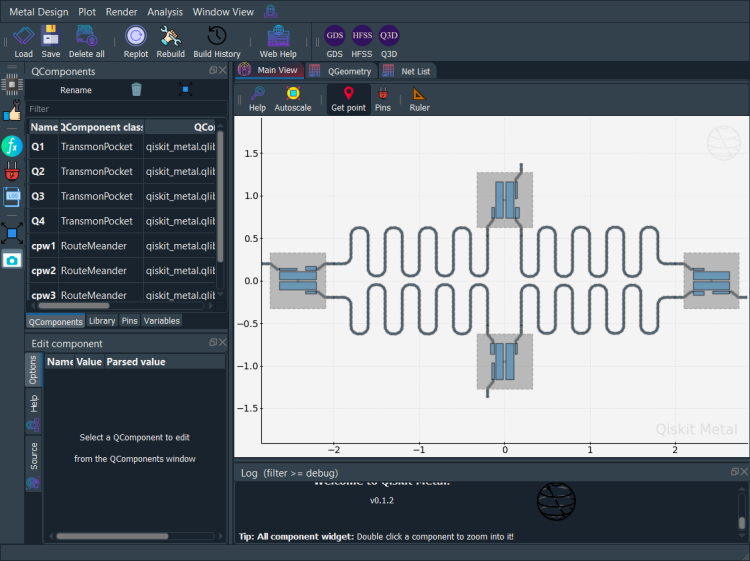

In [6]:
gui.screenshot()

In [7]:
design.qgeometry.tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,hfss_resistance,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name
0,1,rect_jj,"LINESTRING (2.42251 -0.01500, 2.42251 0.01500)",1,False,False,main,0.02,10nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
1,2,rect_jj,"LINESTRING (-0.01500 -0.95000, 0.01500 -0.95000)",1,False,False,main,0.02,10nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
2,3,rect_jj,"LINESTRING (-2.42251 0.01500, -2.42251 -0.01500)",1,False,False,main,0.02,10nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
3,4,rect_jj,"LINESTRING (0.01500 0.95000, -0.01500 0.95000)",1,False,False,main,0.02,10nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction


## 2. Finite Element Eigenmode Analysis

#### Setup

Select the analysis you intend to run from the `qiskit_metal.analyses` collection.<br>
Select the design to analyze and the tool to use for any external simulation.

In [8]:
from qiskit_metal.analyses.quantization import EPRanalysis

In [9]:
analysis = EPRanalysis(design, "hfss")

Review and update the convergence parameters and junction properties by executing following two cells. We exemplify three different methods to update the setup parameters.

In [10]:
analysis.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 1,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

In [11]:
# # -- settings --
# # example: update single setting
analysis.sim.setup.max_passes = 3
# analysis.sim.setup.vars.Lj = '11 nH'
# # example: update multiple settings
# analysis.sim.setup_update(max_delta_f = 0.4, min_freq_ghz = 1.1)

analysis.sim.setup.n_modes = 8

analysis.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 8,
 'max_delta_f': 0.5,
 'max_passes': 3,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

#### Execute simulation and verify convergence and EM field
Analyze a single qubit with shorted terminations. Then observe the frequency convergence plot. If not converging, you might want to increase the min_passes value to force the renderer to increase accuracy.

You can use the method `run()` instead of `sim.run()` in the following cell if you want to run both eigenmode and epr analysis in a single step. If so, make sure to also tweak the setup for the epr analysis. The input parameters are otherwise the same for the two methods.

In [13]:
analysis.sim.run(name="EPR4qb", 
               components=['Q1', 'Q2', 'Q3', 'Q4', 'cpw1', 'cpw2', 'cpw3', 'cpw4'], 
               open_terminations=[], box_plus_buffer = False)
analysis.sim.plot_convergences()

INFO 10:31AM [connect_design]: 	Opened active design
	Design:    EPR4qb_hfss [Solution type: Eigenmode]
INFO 10:31AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 10:31AM [analyze]: Analyzing setup Setup
10:32AM 52s INFO [get_f_convergence]: Saved convergences to C:\Users\neohu\Workspaces\QiskitMetalTutorials\Ntut\4-Analysis\EPR-on-4qubits\full-run\hfss_eig_f_convergence.csv


The last variables you pass to the `run()` or `sim.run()` methods, will be stored in the `sim.setup` dictionary under the key `run`. You can recall the information passed by either accessing the dictionary directly, or by using the print handle below.

In [14]:
# analysis.setup.run    <- direct access
analysis.sim.print_run_args()

This analysis object run with the following kwargs:
{'name': 'EPR4qb', 'components': ['Q1', 'Q2', 'Q3', 'Q4', 'cpw1', 'cpw2', 'cpw3', 'cpw4'], 'open_terminations': [], 'port_list': None, 'jj_to_port': None, 'ignored_jjs': None, 'box_plus_buffer': False}



(optional) Captures the renderer GUI

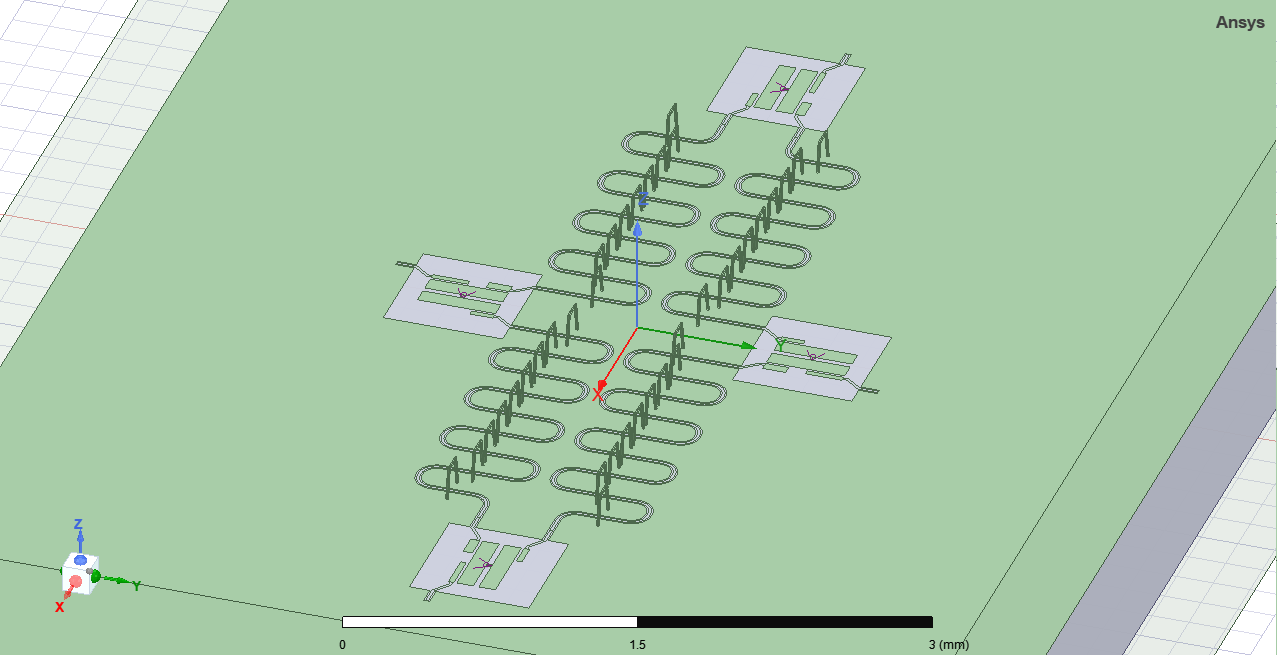

WindowsPath('C:/Users/neohu/Workspaces/QiskitMetalTutorials/Ntut/4-Analysis/EPR-on-4qubits/full-run/ansys.png')

In [15]:
analysis.sim.save_screenshot()

(optional) Work directly with the convergence numbers

In [16]:
analysis.sim.convergence_f

,re(Mode(1)) [g],re(Mode(2)) [g],re(Mode(3)) [g],re(Mode(4)) [g],re(Mode(5)) [g],re(Mode(6)) [g],re(Mode(7)) [g],re(Mode(8)) [g]
Pass [],,,,,,,,
1,3.315328,3.695302,4.221811,4.233664,5.858031,6.216456,6.669428,6.783319
2,4.335970,4.688513,4.695394,4.713766,6.735067,6.978884,7.529070,7.599609
3,5.162897,5.177882,5.205093,5.392949,7.315331,7.448463,7.745550,7.901229


(optional) You can re-run the analysis after varying the parameters.<br>
Not passing the parameter `components` to the `sim.run()` method, skips the rendering and tries to run the analysis on the latest design. If a design is not found, the full metal design is rendered.

In [17]:
# analysis.sim.setup.min_freq_ghz = 4
# analysis.sim.run()
# analysis.sim.convergence_f

### 2.3 Verify that the Electro(magnetic) fields look realistic.

INFO 10:32AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)



           mode 1             


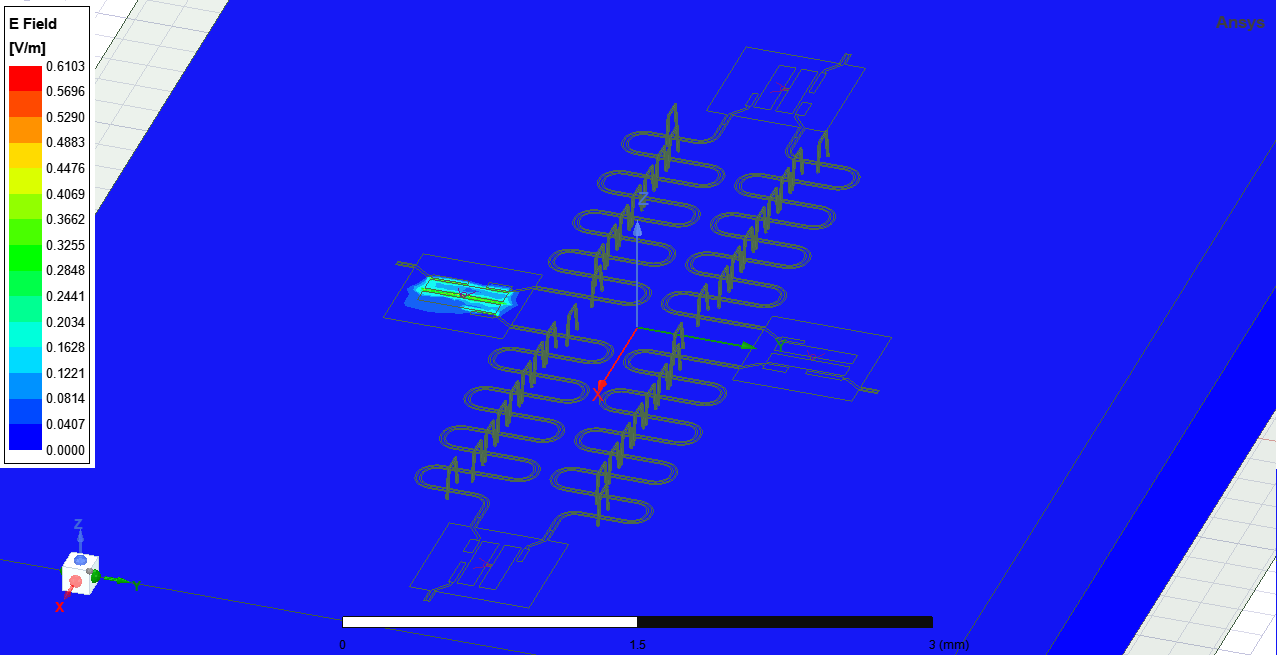

INFO 10:32AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)



           mode 2             


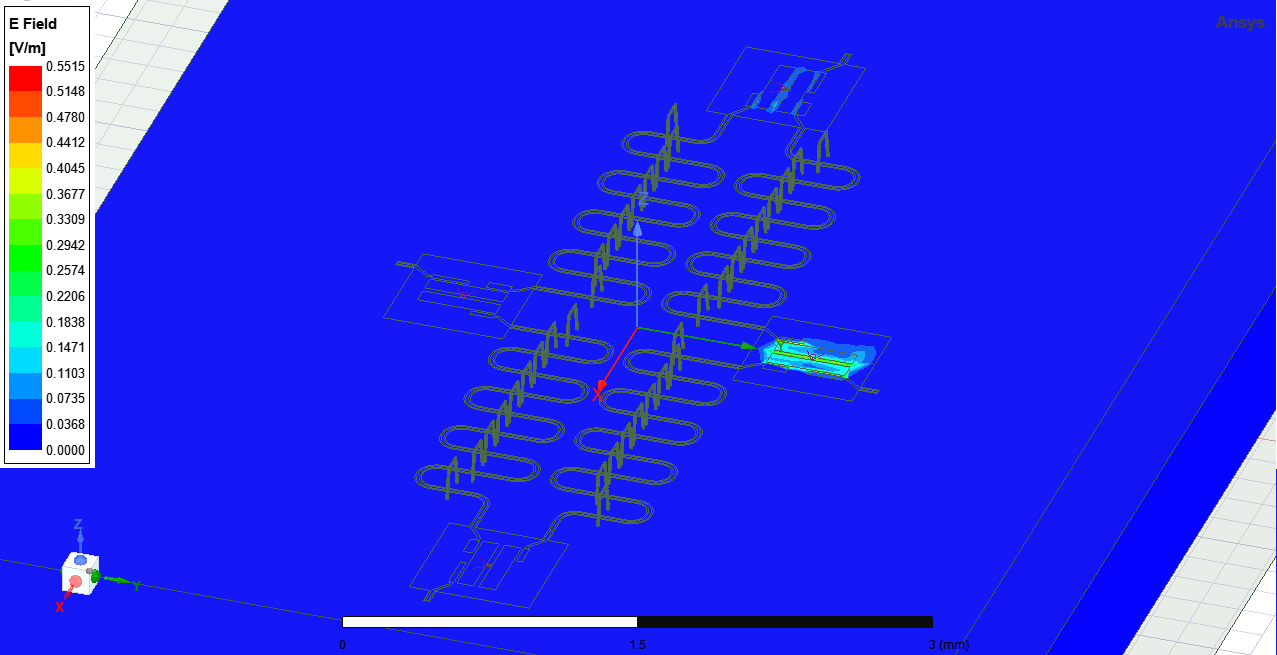

INFO 10:33AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)



           mode 3             


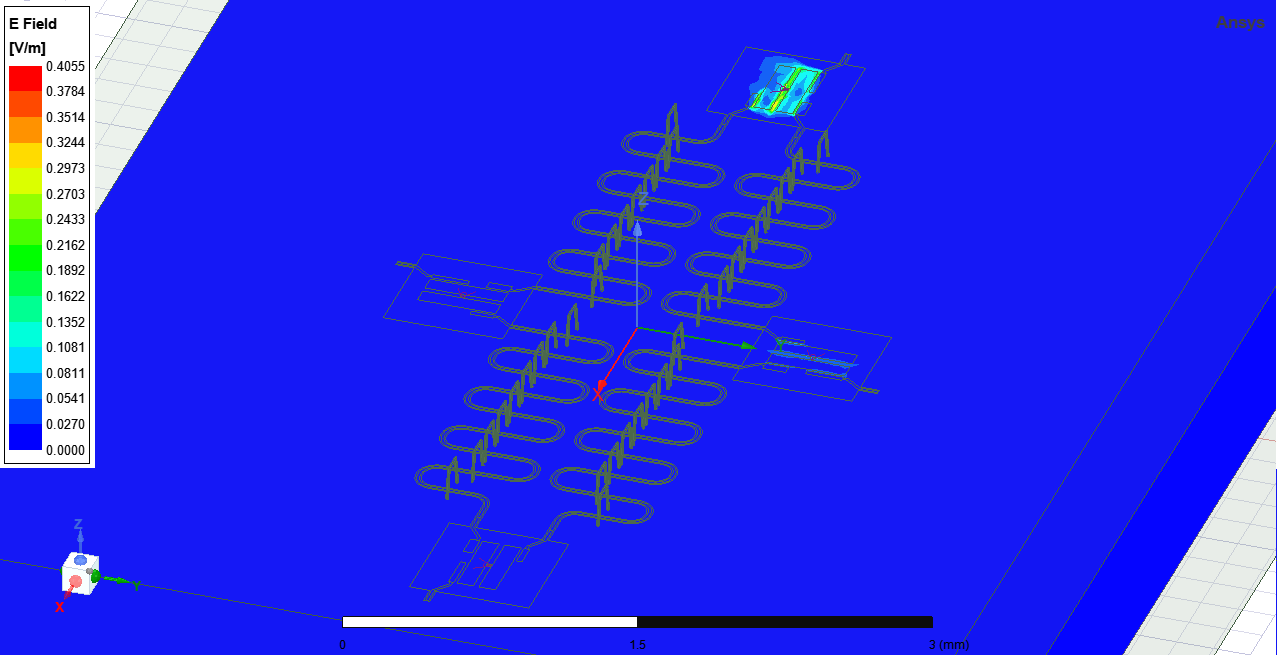

INFO 10:33AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)



           mode 4             


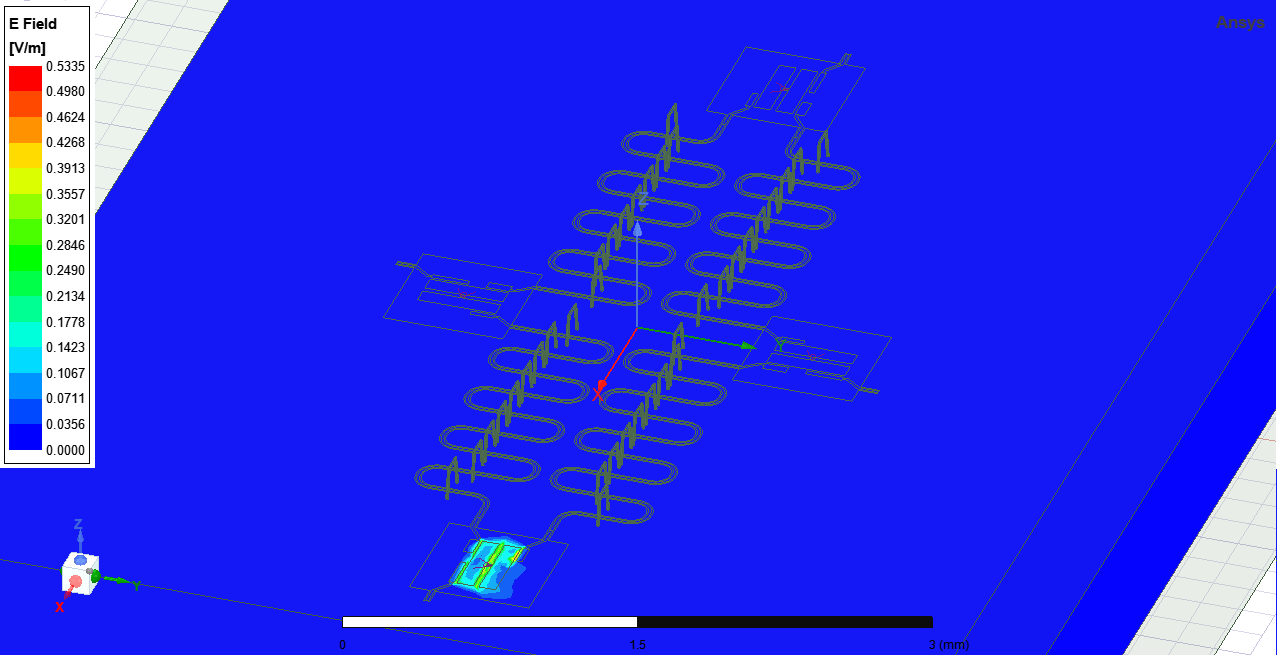

INFO 10:33AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)



           mode 5             


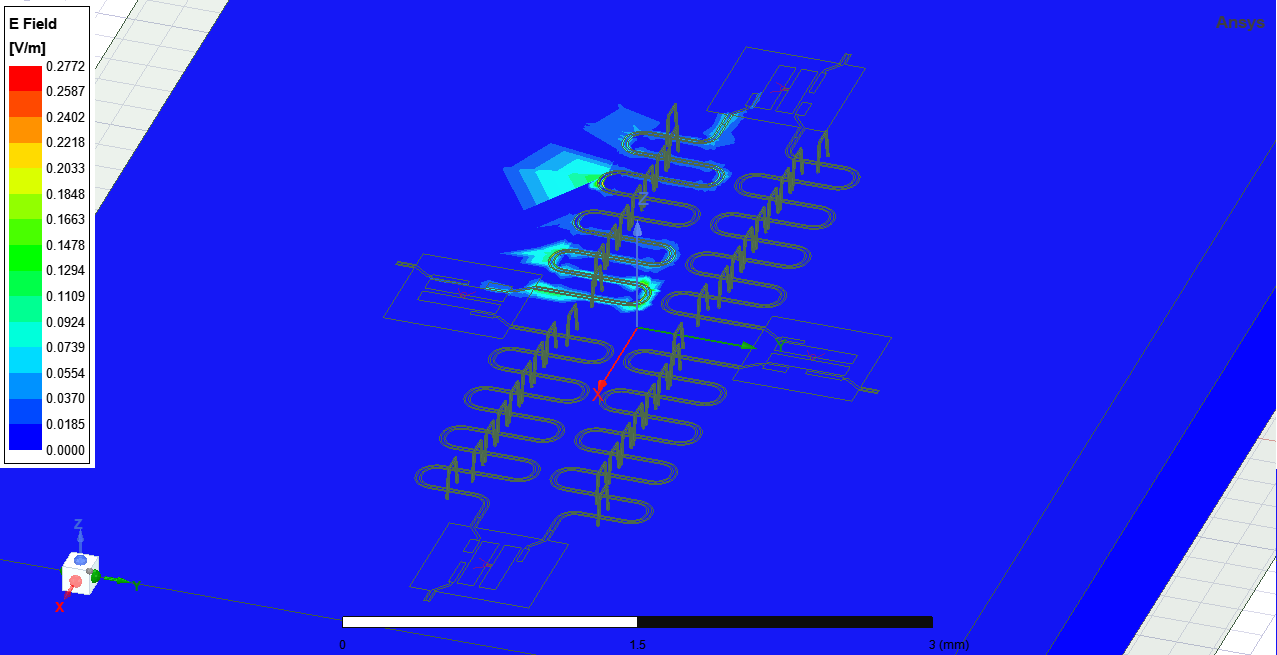

INFO 10:33AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)



           mode 6             


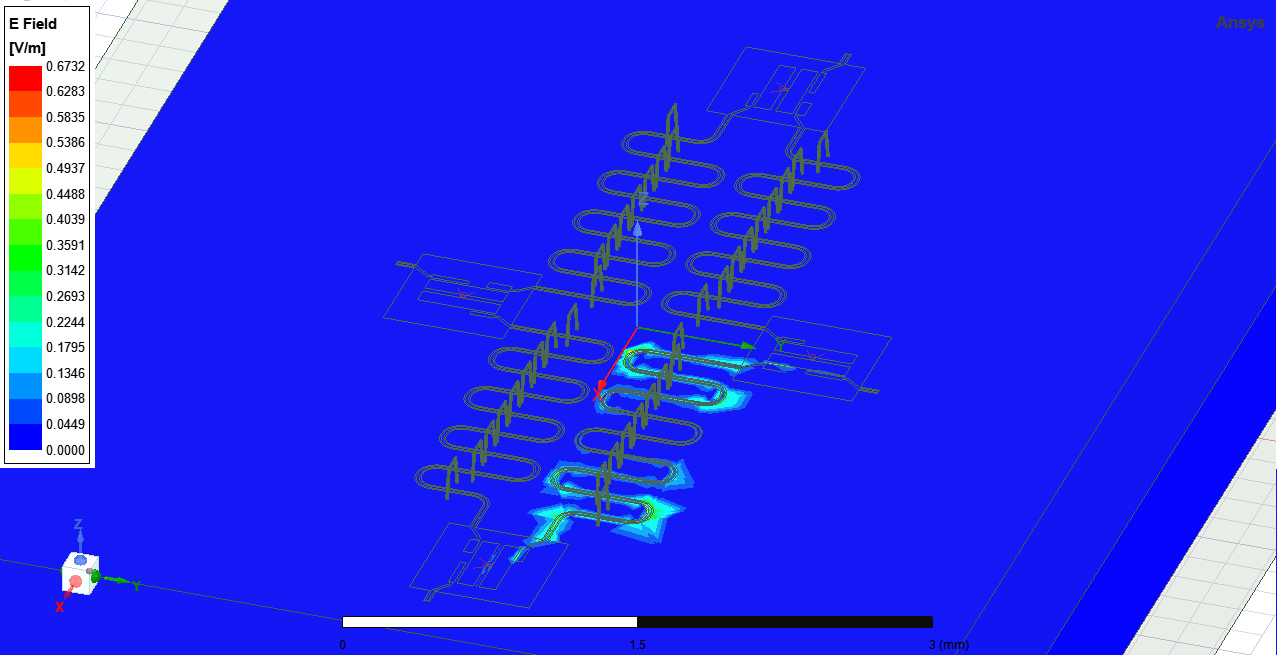

INFO 10:33AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)



           mode 7             


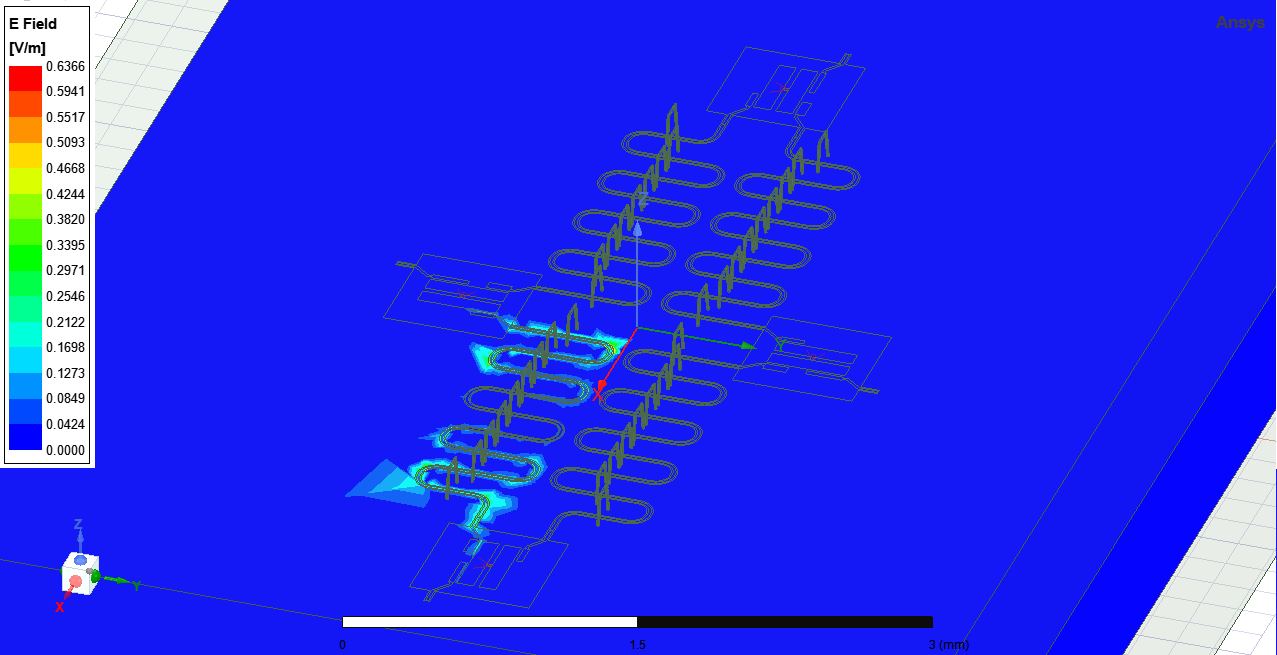

INFO 10:33AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)



           mode 8             


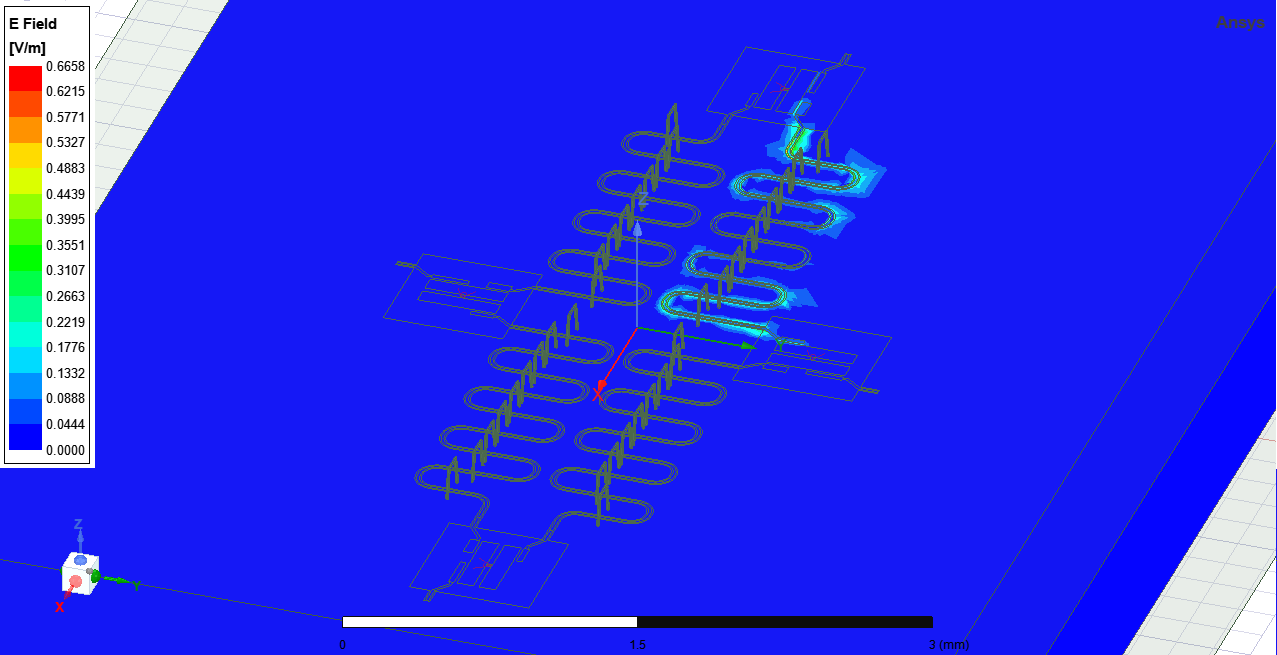

In [18]:
for modej in range(1, 9):
    print()
    print( '==============================')
    print(f'           mode {modej}             ')
    analysis.sim.plot_fields('main', eigenmode=modej)   # TODO:::: Ez, normal component.....decide which field typically on the qbit, or on the crossing between meanders
    analysis.sim.save_screenshot()

(optional) clear the renderer by removing the fields

In [19]:
analysis.sim.clear_fields()

## 3. EPR Analysis

### Setup

Identify the non-linear (Josephson) junctions in the model. You will need to list the junctions in the epr setup.

In this case there's only one junction, namely 'jj'. Let's see what we need to change in the default setup.

In [20]:
analysis.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': '',
   'line': ''}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

The name of the `Lj_variable` and `Cj_variable` match with our model. However it is missing the names of the shapes that identify the junction (`rect` and `line`). Look for those in the renderer and find the name. Then let's change the name (See below).

In [21]:
del analysis.setup.junctions['jj']
analysis.setup.junctions = {}
for jth_junction in range(1, 5):
    analysis.setup.junctions[f'jj{jth_junction}'] = Dict(rect=f'JJ_rect_Lj_Q{jth_junction}_rect_jj', 
                                       line=f'JJ_Lj_Q{jth_junction}_rect_jj_',
                                       Lj_variable='Lj', Cj_variable='Cj')
analysis.setup.sweep_variable = 'Lj'
pprint(analysis.setup)

{'cos_trunc': 8,
 'dissipatives': {'dielectrics_bulk': ['main']},
 'fock_trunc': 7,
 'junctions': {'jj1': {'Cj_variable': 'Cj',
                       'Lj_variable': 'Lj',
                       'line': 'JJ_Lj_Q1_rect_jj_',
                       'rect': 'JJ_rect_Lj_Q1_rect_jj'},
               'jj2': {'Cj_variable': 'Cj',
                       'Lj_variable': 'Lj',
                       'line': 'JJ_Lj_Q2_rect_jj_',
                       'rect': 'JJ_rect_Lj_Q2_rect_jj'},
               'jj3': {'Cj_variable': 'Cj',
                       'Lj_variable': 'Lj',
                       'line': 'JJ_Lj_Q3_rect_jj_',
                       'rect': 'JJ_rect_Lj_Q3_rect_jj'},
               'jj4': {'Cj_variable': 'Cj',
                       'Lj_variable': 'Lj',
                       'line': 'JJ_Lj_Q4_rect_jj_',
                       'rect': 'JJ_rect_Lj_Q4_rect_jj'}},
 'sweep_variable': 'Lj'}


We will now run epr as a single step. On screen you will observe various information in this order:
* stored energy = Electric and magnetic energy stored in the substrate and the system as a whole.
* EPR analysis results for all modes/variations.
* Spectrum analysis.
* Hamiltonian report.

In [22]:
print('ALL IS WELL ... UP TO NOW')

ALL IS WELL ... UP TO NOW


### Run EPR

In [25]:
# analysis.run_epr()

### equivalent individual calls
s = analysis.setup
analysis.epr_start()

Design "EPR4qb_hfss" info:
	# eigenmodes    8
	# variations    1


{'junctions': {'jj1': {'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_',
   'Lj_variable': 'Lj',
   'Cj_variable': 'Cj'},
  'jj2': {'rect': 'JJ_rect_Lj_Q2_rect_jj',
   'line': 'JJ_Lj_Q2_rect_jj_',
   'Lj_variable': 'Lj',
   'Cj_variable': 'Cj'},
  'jj3': {'rect': 'JJ_rect_Lj_Q3_rect_jj',
   'line': 'JJ_Lj_Q3_rect_jj_',
   'Lj_variable': 'Lj',
   'Cj_variable': 'Cj'},
  'jj4': {'rect': 'JJ_rect_Lj_Q4_rect_jj',
   'line': 'JJ_Lj_Q4_rect_jj_',
   'Lj_variable': 'Lj',
   'Cj_variable': 'Cj'}},
 'dissipatives': {'dielectrics_bulk': ['main']}}

In [26]:
analysis.get_stored_energy()

Design "EPR4qb_hfss" info:
	# eigenmodes    8
	# variations    1
Design "EPR4qb_hfss" info:
	# eigenmodes    8
	# variations    1

        energy_elec_all       = 1.39547484165214e-23
        energy_elec_substrate = 1.2701242221604e-23
        EPR of substrate = 91.0%

        energy_mag    = 1.38868046826853e-23
        energy_mag % of energy_elec_all  = 99.5%
        


In [27]:
analysis.run_analysis()

  options=pd.Series(get_instance_vars(self.options)),




Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 5.16 GHz   [1/8]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.7%    5.2e-24 7.002e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.94%
	jj1             0.000488044  (+)        1.02716e-05
		Energy fraction (Lj over Lj&Cj)= 97.94%
	jj2             0.976688  (+)        0.0205557
		Energy fraction (Lj over Lj&Cj)= 97.94%
	jj3             0.00697276  (+)        0.000146751


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 97.94%
	jj4             0.00106802  (+)        2.24779e-05
		(U_tot_cap-U_tot_ind)/mean=1.09%
Calculating Qdielectric_main for mode 0 (0/7)


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})



p_dielectric_main_0 = 0.9109772523793046

  Mode 1 at 5.18 GHz   [2/8]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.7%  4.776e-24 6.259e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.93%
	jj1             0.000463704  (+)        9.81601e-06
		Energy fraction (Lj over Lj&Cj)= 97.93%
	jj2             0.00247834  (+)        5.24631e-05
		Energy fraction (Lj over Lj&Cj)= 97.93%
	jj3             0.0387936  (+)        0.000821209


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 97.93%
	jj4             0.944784  (+)        0.0199998
		(U_tot_cap-U_tot_ind)/mean=1.05%
Calculating Qdielectric_main for mode 1 (1/7)


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})



p_dielectric_main_1 = 0.8909314942624859

  Mode 2 at 5.21 GHz   [3/8]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.1%  2.605e-24 2.422e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_2j   sign s_2j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.91%
	jj1             5.40851e-05  (+)        1.15698e-06
		Energy fraction (Lj over Lj&Cj)= 97.91%
	jj2             0.00587555  (+)        0.000125688
		Energy fraction (Lj over Lj&Cj)= 97.91%
	jj3              0.94258  (+)        0.0201634


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 97.91%
	jj4             0.0409081  (+)        0.000875096
		(U_tot_cap-U_tot_ind)/mean=1.11%
Calculating Qdielectric_main for mode 2 (2/7)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_2 = 0.8868755689402359


  _Om = pd.Series({})




  Mode 3 at 5.39 GHz   [4/8]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.7%  4.245e-24 5.628e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_3j   sign s_3j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.76%
	jj1              0.98418  (+)        0.0226004
		Energy fraction (Lj over Lj&Cj)= 97.76%
	jj2             0.000565795  (+)        1.29928e-05
		Energy fraction (Lj over Lj&Cj)= 97.76%
	jj3             1.11531e-06  (+)        2.56117e-08


  Qp = pd.Series({})

  sol = sol.append(self.get_Qdielectric(



		Energy fraction (Lj over Lj&Cj)= 97.76%
	jj4             0.000675343  (+)        1.55084e-05
		(U_tot_cap-U_tot_ind)/mean=1.18%
Calculating Qdielectric_main for mode 3 (3/7)
p_dielectric_main_3 = 0.8886824070933845


  _Om = pd.Series({})




  Mode 4 at 7.32 GHz   [5/8]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.4%   1.39e-24 1.385e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_4j   sign s_4j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 95.95%
	jj1             2.54316e-07  (+)        1.07456e-08
		Energy fraction (Lj over Lj&Cj)= 95.95%
	jj2             0.00252055  (+)        0.000106501
		Energy fraction (Lj over Lj&Cj)= 95.95%
	jj3             0.00142879  (+)        6.03709e-05


  Qp = pd.Series({})

  sol = sol.append(self.get_Qdielectric(



		Energy fraction (Lj over Lj&Cj)= 95.95%
	jj4             6.76973e-09  (+)        2.86042e-10
		(U_tot_cap-U_tot_ind)/mean=0.01%
Calculating Qdielectric_main for mode 4 (4/7)
p_dielectric_main_4 = 0.8922387190394346


  _Om = pd.Series({})




  Mode 5 at 7.45 GHz   [6/8]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.6%  9.212e-24  9.16e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_5j   sign s_5j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 95.80%
	jj1             0.0047884  (+)        0.000209755
		Energy fraction (Lj over Lj&Cj)= 95.80%
	jj2             3.42064e-07  (+)        1.49841e-08
		Energy fraction (Lj over Lj&Cj)= 95.80%
	jj3             4.26772e-07  (+)        1.86947e-08


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 95.80%
	jj4             0.00169783  (+)        7.43734e-05
		(U_tot_cap-U_tot_ind)/mean=-0.02%
Calculating Qdielectric_main for mode 5 (5/7)


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})



p_dielectric_main_5 = 0.9109817287370431

  Mode 6 at 7.75 GHz   [7/8]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.5%  6.977e-24 6.943e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_6j   sign s_6j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 95.48%
	jj1             0.00163095  (+)        7.72565e-05
		Energy fraction (Lj over Lj&Cj)= 95.48%
	jj2             0.00336994  (+)        0.000159631
		Energy fraction (Lj over Lj&Cj)= 95.48%
	jj3             4.63611e-07  (+)        2.19608e-08


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 95.48%
	jj4             3.87374e-07  (+)        1.83495e-08
		(U_tot_cap-U_tot_ind)/mean=0.01%
Calculating Qdielectric_main for mode 6 (6/7)


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})



p_dielectric_main_6 = 0.9101735009831249

  Mode 7 at 7.90 GHz   [8/8]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.5%  7.394e-24 7.358e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_7j   sign s_7j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 95.30%
	jj1             5.53018e-07  (+)        2.72595e-08
		Energy fraction (Lj over Lj&Cj)= 95.30%
	jj2             1.84237e-08  (+)        9.08146e-10
		Energy fraction (Lj over Lj&Cj)= 95.30%
	jj3             0.00181639  (+)        8.9534e-05


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 95.30%
	jj4             0.0031525  (+)        0.000155394
		(U_tot_cap-U_tot_ind)/mean=0.00%
Calculating Qdielectric_main for mode 7 (7/7)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_7 = 0.908962028882667


  options=pd.Series(get_instance_vars(self.options)),




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project1\EPR4qb_hfss\2023-02-21 10-59-30.npz




In [ ]:
analysis.spectrum_analysis(s.cos_trunc, s.fock_trunc)

WARNING 11:00AM [__init__]: <p>Error: <class 'IndexError'></p>


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0



In [24]:
analysis.report_hamiltonian(s.swp_variable)

Design "EPR4qb_hfss" info:
	# eigenmodes    8
	# variations    1
Design "EPR4qb_hfss" info:
	# eigenmodes    8
	# variations    1
Design "EPR4qb_hfss" info:
	# eigenmodes    8
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 1.47873689334075e-23
        energy_elec_substrate = 1.34411568675466e-23
        EPR of substrate = 90.9%

        energy_mag    = 1.47166719982601e-23
        energy_mag % of energy_elec_all  = 99.5%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 5.16 GHz   [1/8]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.7%    5.2e-24 7.002e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.94%
	jj1             0.000488044  (+)        1.02716e-05
		Energy fraction (Lj over Lj&Cj)= 97.94%
	jj2             0.976688  (+)        0.0205557
		Energy fraction (Lj over Lj&Cj)= 97.94%
	jj3             0.00697276  (+)        0.000146751


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 97.94%
	jj4             0.00106802  (+)        2.24779e-05
		(U_tot_cap-U_tot_ind)/mean=1.09%
Calculating Qdielectric_main for mode 0 (0/7)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_0 = 0.9109772523793046


  _Om = pd.Series({})




  Mode 1 at 5.18 GHz   [2/8]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.7%  4.776e-24 6.259e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.93%
	jj1             0.000463704  (+)        9.81601e-06
		Energy fraction (Lj over Lj&Cj)= 97.93%
	jj2             0.00247834  (+)        5.24631e-05
		Energy fraction (Lj over Lj&Cj)= 97.93%
	jj3             0.0387936  (+)        0.000821209


  Qp = pd.Series({})

  sol = sol.append(self.get_Qdielectric(



		Energy fraction (Lj over Lj&Cj)= 97.93%
	jj4             0.944784  (+)        0.0199998
		(U_tot_cap-U_tot_ind)/mean=1.05%
Calculating Qdielectric_main for mode 1 (1/7)
p_dielectric_main_1 = 0.8909314942624859


  _Om = pd.Series({})




  Mode 2 at 5.21 GHz   [3/8]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.1%  2.605e-24 2.422e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_2j   sign s_2j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.91%
	jj1             5.40851e-05  (+)        1.15698e-06
		Energy fraction (Lj over Lj&Cj)= 97.91%
	jj2             0.00587555  (+)        0.000125688
		Energy fraction (Lj over Lj&Cj)= 97.91%
	jj3              0.94258  (+)        0.0201634


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 97.91%
	jj4             0.0409081  (+)        0.000875096
		(U_tot_cap-U_tot_ind)/mean=1.11%
Calculating Qdielectric_main for mode 2 (2/7)


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})



p_dielectric_main_2 = 0.8868755689402359

  Mode 3 at 5.39 GHz   [4/8]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.7%  4.245e-24 5.628e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_3j   sign s_3j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.76%
	jj1              0.98418  (+)        0.0226004
		Energy fraction (Lj over Lj&Cj)= 97.76%
	jj2             0.000565795  (+)        1.29928e-05
		Energy fraction (Lj over Lj&Cj)= 97.76%
	jj3             1.11531e-06  (+)        2.56117e-08


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 97.76%
	jj4             0.000675343  (+)        1.55084e-05
		(U_tot_cap-U_tot_ind)/mean=1.18%
Calculating Qdielectric_main for mode 3 (3/7)


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})



p_dielectric_main_3 = 0.8886824070933845

  Mode 4 at 7.32 GHz   [5/8]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.4%   1.39e-24 1.385e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_4j   sign s_4j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 95.95%
	jj1             2.54316e-07  (+)        1.07456e-08
		Energy fraction (Lj over Lj&Cj)= 95.95%
	jj2             0.00252055  (+)        0.000106501
		Energy fraction (Lj over Lj&Cj)= 95.95%
	jj3             0.00142879  (+)        6.03709e-05


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 95.95%
	jj4             6.76973e-09  (+)        2.86042e-10
		(U_tot_cap-U_tot_ind)/mean=0.01%
Calculating Qdielectric_main for mode 4 (4/7)


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})



p_dielectric_main_4 = 0.8922387190394346

  Mode 5 at 7.45 GHz   [6/8]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.6%  9.212e-24  9.16e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_5j   sign s_5j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 95.80%
	jj1             0.0047884  (+)        0.000209755
		Energy fraction (Lj over Lj&Cj)= 95.80%
	jj2             3.42064e-07  (+)        1.49841e-08
		Energy fraction (Lj over Lj&Cj)= 95.80%
	jj3             4.26772e-07  (+)        1.86947e-08


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 95.80%
	jj4             0.00169783  (+)        7.43734e-05
		(U_tot_cap-U_tot_ind)/mean=-0.02%
Calculating Qdielectric_main for mode 5 (5/7)


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})



p_dielectric_main_5 = 0.9109817287370431

  Mode 6 at 7.75 GHz   [7/8]
    Calculating ℰ_magnetic,

KeyboardInterrupt: 

In [ ]:
print('ALL IS WELL')